<a href="https://colab.research.google.com/github/Lorybs/PES_ciencia_de_dados/blob/main/ProjetoPES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Instalando os primeiros principais pacotes

In [ ]:
!pip install pandas
!pip install scipy
!pip install matplotlib
!pip install kaggle


In [2]:
#importanto alguns pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


#2 Importanto os dados do Kaggle

In [3]:
from google.colab import files
files.upload() #enviar o arquivo kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lorraynebatista","key":"3a7a5a767479761e7e7908aa37c45704"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
#importando base com índices de fertilidade
!kaggle datasets download -d omarsobhy14/fertility-rate-per-country

  0% 0.00/48.3k [00:00<?, ?B/s]
100% 48.3k/48.3k [00:00<00:00, 96.9MB/s]


In [7]:
#importando dados dos países com média de tempo de escolaridade
!kaggle datasets download -d fredericksalazar/average-years-of-schooling-since-1870-2017

  0% 0.00/32.7k [00:00<?, ?B/s]
100% 32.7k/32.7k [00:00<00:00, 41.0MB/s]


In [8]:
#importando base de renda percapta dos países
!kaggle datasets download -d zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths

  0% 0.00/556k [00:00<?, ?B/s]
100% 556k/556k [00:00<00:00, 180MB/s]


In [9]:
#importando base de país por região
!kaggle datasets download -d andradaolteanu/country-mapping-iso-continent-region

  0% 0.00/4.96k [00:00<?, ?B/s]
100% 4.96k/4.96k [00:00<00:00, 17.6MB/s]


In [10]:
!unzip \*.zip  && rm *.zip

Archive:  world-gdpgdp-gdp-per-capita-and-annual-growths.zip
  inflating: gdp.csv                 
  inflating: gdp_growth.csv          
  inflating: gdp_per_capita.csv      
  inflating: gdp_per_capita_growth.csv  
  inflating: gdp_ppp.csv             
  inflating: gdp_ppp_per_capita.csv  

Archive:  fertility-rate-per-country.zip
  inflating: API_SP.DYN.TFRT.IN_DS2_en_csv_v2_5455118.csv  

Archive:  country-mapping-iso-continent-region.zip
  inflating: continents2.csv         

Archive:  average-years-of-schooling-since-1870-2017.zip
  inflating: mean-years-of-schooling-long-run.csv  

4 archives were successfully processed.


In [11]:
fertilidade = pd.read_csv("API_SP.DYN.TFRT.IN_DS2_en_csv_v2_5455118.csv")

In [12]:
escolaridade = pd.read_csv("mean-years-of-schooling-long-run.csv", sep=";")

In [13]:
percapta = pd.read_csv("gdp_per_capita.csv")

In [14]:
regiao = pd.read_csv("continents2.csv")

# 3 Inspecionando os dados


In [15]:
fertilidade.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,3.625000,3.417000,...,2.117000,2.148000,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,NaN
1,Africa Eastern and Southern,AFE,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,6.810571,6.818612,...,4.808821,4.739863,4.677619,4.615671,4.570410,4.527707,4.482899,4.416902,4.354710,NaN
2,Afghanistan,AFG,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,7.320000,7.339000,...,5.696000,5.560000,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,NaN
3,Africa Western and Central,AFW,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,6.564967,6.589806,...,5.506350,5.437493,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,NaN
4,Angola,AGO,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,7.194000,7.267000,...,5.953000,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,NaN


In [16]:
escolaridade.head()

,Entity,Code,Year,avg_years_of_schooling
0,Afghanistan,AFG,1870,0.01
1,Afghanistan,AFG,1875,0.01
2,Afghanistan,AFG,1880,0.01
3,Afghanistan,AFG,1885,0.01
4,Afghanistan,AFG,1890,0.01


In [18]:
percapta.head()

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,190.845484,192.337167,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,144.326212,128.582470,...,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN


In [19]:
regiao.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


#3 Análise Exporatória e pré processamento


In [20]:
fertilidade.shape

(266, 65)

In [21]:
fertilidade.isnull().sum()

Country Name      0
Country Code      0
1960             13
1961             14
1962             13
               ... 
2018              8
2019              8
2020              7
2021              8
2022            266
Length: 65, dtype: int64

In [22]:
#ajustando o nome da coluna de sigla do país na tabela fertilidade
fertilidade.rename(columns={'Country Code':'Code'},inplace=True)
fertilidade.rename(columns={'Country Name':'Country'},inplace=True)

In [23]:
#transformando o ano da tabela de fertilidade em variável, ajustando para o formato final do dataset
fertilidade = pd.melt(frame = fertilidade,id_vars=['Country','Code'], var_name = 'Year',value_name='indice_fertilidade')

In [24]:
fertilidade.head()

,Country,Code,Year,indice_fertilidade
0,Aruba,ABW,1960,4.820000
1,Africa Eastern and Southern,AFE,1960,6.724125
2,Afghanistan,AFG,1960,7.282000
3,Africa Western and Central,AFW,1960,6.458448
4,Angola,AGO,1960,6.708000


In [25]:
fertilidade.isnull().sum()

Country                 0
Code                    0
Year                    0
indice_fertilidade    879
dtype: int64

In [26]:
fertilidade['Year'] = fertilidade['Year'].astype('int')

In [27]:
fertilidade = fertilidade.drop(fertilidade[(fertilidade['Year'] < 1960) | (fertilidade['Year'] > 2020)].index)

In [28]:
fertilidade.isnull().sum()

Country                 0
Code                    0
Year                    0
indice_fertilidade    605
dtype: int64

In [29]:
#ordenando por código do país e ano
fertilidade = fertilidade.sort_values(['Code' , 'Year'], ascending=True , ignore_index=True)

In [32]:
fertilidade.head()

,Country,Code,Year,indice_fertilidade
0,Aruba,ABW,1960,4.820
1,Aruba,ABW,1961,4.655
2,Aruba,ABW,1962,4.471
3,Aruba,ABW,1963,4.271
4,Aruba,ABW,1964,4.059


In [33]:
fertilidade = fertilidade.fillna(axis=0, method='ffill', limit=3)
fertilidade = fertilidade.fillna(axis=0, method='bfill', limit=3)

In [34]:
fertilidade.isnull().sum()

Country                 0
Code                    0
Year                    0
indice_fertilidade    472
dtype: int64

In [35]:
fertilidade.head()

,Country,Code,Year,indice_fertilidade
0,Aruba,ABW,1960,4.820
1,Aruba,ABW,1961,4.655
2,Aruba,ABW,1962,4.471
3,Aruba,ABW,1963,4.271
4,Aruba,ABW,1964,4.059


In [ ]:
!pip install fancyimpute
import pandas as pd
from fancyimpute import KNN

In [39]:
def preencher_ausentes_knn(fertilidade, indice_fertilidade):
    # Extrair a coluna em um array numpy
    coluna_array = fertilidade[indice_fertilidade].values

    # Instanciar o objeto KNN
    knn_imputer = KNN(k=5)  # Altere o valor de acordo com suas necessidades

    # Preencher os valores ausentes na coluna selecionada
    coluna_array_filled = knn_imputer.fit_transform(coluna_array.reshape(-1, 1))

    # Substituir a coluna original pelos valores preenchidos
    fertilidade[indice_fertilidade] = coluna_array_filled.flatten()

    return fertilidade

In [ ]:
fertilidade = preencher_ausentes_knn(fertilidade, 'indice_fertilidade')

In [41]:
display(fertilidade)

,Country,Code,Year,indice_fertilidade
0,Aruba,ABW,1960,4.820
1,Aruba,ABW,1961,4.655
2,Aruba,ABW,1962,4.471
3,Aruba,ABW,1963,4.271
4,Aruba,ABW,1964,4.059
...,...,...,...,...
16221,Zimbabwe,ZWE,2016,3.771
16222,Zimbabwe,ZWE,2017,3.706
16223,Zimbabwe,ZWE,2018,3.659
16224,Zimbabwe,ZWE,2019,3.599


In [42]:
fertilidade.isnull().sum()

Country               0
Code                  0
Year                  0
indice_fertilidade    0
dtype: int64

In [43]:
#criando uma variável chave primária do tipo string para fazer o merge com as outras bases
fertilidade['nova_chave'] = fertilidade['Code'].astype(str) + '_' + fertilidade['Year'].astype(str)

In [46]:
fertilidade = fertilidade[['nova_chave', 'Country', 'Code', 'Year', 'indice_fertilidade']]

In [272]:
fertilidade.head()

,nova_chave,Country Name,Code,Year,indice_fert
0,ABW_1960,Aruba,ABW,1960,4.820
1,ABW_1961,Aruba,ABW,1961,4.655
2,ABW_1962,Aruba,ABW,1962,4.471
3,ABW_1963,Aruba,ABW,1963,4.271
4,ABW_1964,Aruba,ABW,1964,4.059


In [47]:
#criando uma variável chave primária do tipo string para fazer o merge com as outras bases
escolaridade['nova_chave'] = escolaridade['Code'].astype(str) + '_' + escolaridade['Year'].astype(str)

In [51]:
#simplificando nome da coluna escolaridade
escolaridade.rename(columns={'avg_years_of_schooling':'Avg_Years_at_Shool'},inplace=True)

In [52]:
escolaridade.columns.values

array(['Entity', 'Code', 'Year', 'Avg_Years_at_Shool', 'nova_chave'],
      dtype=object)

In [53]:
escolaridade = escolaridade[['nova_chave', 'Entity', 'Code', 'Year', 'Avg_Years_at_Shool']]

In [54]:
escolaridade.head()

,nova_chave,Entity,Code,Year,Avg_Years_at_Shool
0,AFG_1870,Afghanistan,AFG,1870,0.01
1,AFG_1875,Afghanistan,AFG,1875,0.01
2,AFG_1880,Afghanistan,AFG,1880,0.01
3,AFG_1885,Afghanistan,AFG,1885,0.01
4,AFG_1890,Afghanistan,AFG,1890,0.01


In [55]:
escolaridade.isnull().sum()

nova_chave            0
Entity                0
Code                  0
Year                  0
Avg_Years_at_Shool    0
dtype: int64

In [56]:
#ajustando nome da coluna da sigla do país
regiao.rename(columns={'alpha-3':'Code'},inplace=True)

In [57]:
regiao.head()

,name,alpha-2,Code,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [58]:
#selecionando apenas colunas necesssarias para o novo dataset
regiao.columns.values

array(['name', 'alpha-2', 'Code', 'country-code', 'iso_3166-2', 'region',
       'sub-region', 'intermediate-region', 'region-code',
       'sub-region-code', 'intermediate-region-code'], dtype=object)

In [59]:
regiaoselecionadas = ['Code' , 'region']

In [60]:
regiao2 = regiao.filter(items=regiaoselecionadas)

In [61]:
regiao2.head()

,Code,region
0,AFG,Asia
1,ALA,Europe
2,ALB,Europe
3,DZA,Africa
4,ASM,Oceania


In [62]:
regiao2.shape

(249, 2)

In [63]:
regiao2.isnull().sum()

Code      0
region    1
dtype: int64

In [64]:
regiao2.dropna(inplace= True)

In [65]:
regiao2.isnull().sum()

Code      0
region    0
dtype: int64

In [66]:
percapta.head()

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,190.845484,192.337167,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,144.326212,128.582470,...,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN


In [68]:
#transformando o ano em variável na tabela de renda percapta, ajustando para o formato final do dataset
percapta.rename(columns={'Country Name':'Country'},inplace=True)
percapta = pd.melt(frame = percapta,id_vars=['Country','Code'], var_name = 'Year',value_name='indice_percapta')

In [69]:
percapta.head()

,Country,Code,Year,indice_percapta
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,147.612227
2,Afghanistan,AFG,1960,59.773234
3,Africa Western and Central,AFW,1960,107.932233
4,Angola,AGO,1960,NaN


In [70]:
percapta['Year'].replace("Unnamed: 65",np.nan,inplace=True)

In [71]:
percapta.shape

(16492, 4)

In [72]:
percapta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          16492 non-null  object 
 1   Code             16492 non-null  object 
 2   Year             16226 non-null  object 
 3   indice_percapta  12837 non-null  float64
dtypes: float64(1), object(3)
memory usage: 515.5+ KB


In [73]:
percapta.isnull().sum()

Country               0
Code                  0
Year                266
indice_percapta    3655
dtype: int64

In [74]:
percapta.dropna(inplace= True)

In [75]:
percapta.isnull().sum()

Country            0
Code               0
Year               0
indice_percapta    0
dtype: int64

In [76]:
percapta.shape

(12837, 4)

In [77]:
#criando uma variável chave primária do tipo string para fazer o merge com as outras bases
percapta['nova_chave'] = percapta['Code'].astype(str) + '_' + percapta['Year'].astype(str)

In [78]:
percapta = percapta[['nova_chave', 'Country', 'Code', 'Year', 'indice_percapta']]

In [79]:
percapta.head()

,nova_chave,Country,Code,Year,indice_percapta
1,AFE_1960,Africa Eastern and Southern,AFE,1960,147.612227
2,AFG_1960,Afghanistan,AFG,1960,59.773234
3,AFW_1960,Africa Western and Central,AFW,1960,107.932233
13,AUS_1960,Australia,AUS,1960,1810.619230
14,AUT_1960,Austria,AUT,1960,935.460427


In [80]:
#selecionando apenas colunas necesssarias para o novodataset
percapta.columns.values

array(['nova_chave', 'Country', 'Code', 'Year', 'indice_percapta'],
      dtype=object)

In [97]:
percaptaselecionadas = ['nova_chave' , 'indice_percapta']

In [98]:
percapta2 = percapta.filter(items=percaptaselecionadas)

In [99]:
percapta2.head()

,nova_chave,indice_percapta
1,AFE_1960,147.612227
2,AFG_1960,59.773234
3,AFW_1960,107.932233
13,AUS_1960,1810.619230
14,AUT_1960,935.460427


In [100]:
#montando um novo dataset com apenas os dados necessários
novodataset1 = pd.merge(fertilidade, escolaridade, left_on = ['nova_chave', 'Country', 'Code', 'Year'], how='inner',
                        right_on=['nova_chave' , 'Entity' , 'Code' , 'Year'] , validate = 'm:m')

In [101]:
display(novodataset1)

,nova_chave,Country,Code,Year,indice_fertilidade,Entity,Avg_Years_at_Shool
0,AFG_1960,Afghanistan,AFG,1960,7.282,Afghanistan,0.22
1,AFG_1965,Afghanistan,AFG,1965,7.305,Afghanistan,0.29
2,AFG_1970,Afghanistan,AFG,1970,7.400,Afghanistan,0.35
3,AFG_1975,Afghanistan,AFG,1975,7.542,Afghanistan,0.62
4,AFG_1980,Afghanistan,AFG,1980,7.588,Afghanistan,0.78
...,...,...,...,...,...,...,...
4990,ZWE_2013,Zimbabwe,ZWE,2013,4.064,Zimbabwe,8.00
4991,ZWE_2014,Zimbabwe,ZWE,2014,3.962,Zimbabwe,8.20
4992,ZWE_2015,Zimbabwe,ZWE,2015,3.849,Zimbabwe,8.20
4993,ZWE_2016,Zimbabwe,ZWE,2016,3.771,Zimbabwe,8.20


In [102]:
novodataset2 = pd.merge(novodataset1,percapta2, how='left', left_on=['nova_chave'], right_on=['nova_chave'])

In [103]:
display(novodataset2)

,nova_chave,Country,Code,Year,indice_fertilidade,Entity,Avg_Years_at_Shool,indice_percapta
0,AFG_1960,Afghanistan,AFG,1960,7.282,Afghanistan,0.22,59.773234
1,AFG_1965,Afghanistan,AFG,1965,7.305,Afghanistan,0.29,101.108325
2,AFG_1970,Afghanistan,AFG,1970,7.400,Afghanistan,0.35,156.518771
3,AFG_1975,Afghanistan,AFG,1975,7.542,Afghanistan,0.62,186.510838
4,AFG_1980,Afghanistan,AFG,1980,7.588,Afghanistan,0.78,272.655510
...,...,...,...,...,...,...,...,...
4990,ZWE_2013,Zimbabwe,ZWE,2013,4.064,Zimbabwe,8.00,1429.998461
4991,ZWE_2014,Zimbabwe,ZWE,2014,3.962,Zimbabwe,8.20,1434.896277
4992,ZWE_2015,Zimbabwe,ZWE,2015,3.849,Zimbabwe,8.20,1445.069702
4993,ZWE_2016,Zimbabwe,ZWE,2016,3.771,Zimbabwe,8.20,1464.588957


In [88]:
datasetfinal = pd.merge(novodataset2,regiao2, how='left', left_on=['Code'], right_on=['Code'])

In [104]:
display(datasetfinal)

,nova_chave,Country,Code,Year,indice_fertilidade,Entity,Avg_Years_at_Shool,indice_percapta,region
0,AFG_1960,Afghanistan,AFG,1960,7.282,Afghanistan,0.22,59.773234,Asia
1,AFG_1965,Afghanistan,AFG,1965,7.305,Afghanistan,0.29,101.108325,Asia
2,AFG_1970,Afghanistan,AFG,1970,7.400,Afghanistan,0.35,156.518771,Asia
3,AFG_1975,Afghanistan,AFG,1975,7.542,Afghanistan,0.62,186.510838,Asia
4,AFG_1980,Afghanistan,AFG,1980,7.588,Afghanistan,0.78,272.655510,Asia
...,...,...,...,...,...,...,...,...,...
4990,ZWE_2013,Zimbabwe,ZWE,2013,4.064,Zimbabwe,8.00,1429.998461,Africa
4991,ZWE_2014,Zimbabwe,ZWE,2014,3.962,Zimbabwe,8.20,1434.896277,Africa
4992,ZWE_2015,Zimbabwe,ZWE,2015,3.849,Zimbabwe,8.20,1445.069702,Africa
4993,ZWE_2016,Zimbabwe,ZWE,2016,3.771,Zimbabwe,8.20,1464.588957,Africa


In [105]:
datasetfinal.columns.values

array(['nova_chave', 'Country', 'Code', 'Year', 'indice_fertilidade',
       'Entity', 'Avg_Years_at_Shool', 'indice_percapta', 'region'],
      dtype=object)

In [106]:
selecionadas = ['nova_chave', 'Country', 'Code', 'Year', 'region', 'indice_fertilidade', 'Avg_Years_at_Shool', 'indice_percapta']

In [107]:
datasetfinal2 = datasetfinal.filter(items=selecionadas)

In [108]:
datasetfinal2 = datasetfinal2.sort_values(['Code' , 'Year'], ascending=True , ignore_index=True)

In [109]:
datasetfinal2.head()

,nova_chave,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,indice_percapta
0,AFG_1960,Afghanistan,AFG,1960,Asia,7.282,0.22,59.773234
1,AFG_1965,Afghanistan,AFG,1965,Asia,7.305,0.29,101.108325
2,AFG_1970,Afghanistan,AFG,1970,Asia,7.400,0.35,156.518771
3,AFG_1975,Afghanistan,AFG,1975,Asia,7.542,0.62,186.510838
4,AFG_1980,Afghanistan,AFG,1980,Asia,7.588,0.78,272.655510


In [110]:
print(datasetfinal2.isnull().sum())

nova_chave              0
Country                 0
Code                    0
Year                    0
region                  0
indice_fertilidade      0
Avg_Years_at_Shool      0
indice_percapta       298
dtype: int64


In [120]:
#ajustando o tipo dos variáveis
datasetfinal2['Country'] = datasetfinal2['Country'].astype('category')
datasetfinal2['Code'] = datasetfinal2['Code'].astype('category')
datasetfinal2['region'] = datasetfinal2['region'].astype('category')
datasetfinal2['nova_chave'] = datasetfinal2['nova_chave'].astype('category')
datasetfinal2['Year'] = datasetfinal2['Year'].astype('int')

In [121]:
datasetfinal2.dtypes

nova_chave            category
Country               category
Code                  category
Year                     int64
region                category
indice_fertilidade     float64
Avg_Years_at_Shool     float64
indice_percapta        float64
dtype: object

In [122]:
datasetfinal2['Country'].cat.categories

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vietnam', 'Zambia', 'Zimbabwe'],
      dtype='object', length=166)

In [123]:
print(datasetfinal2['indice_percapta'].mean())
print(datasetfinal2['indice_percapta'].median())

10015.183989423727
3293.22997867086


In [124]:
datasetfinal2['indice_percapta'].fillna(datasetfinal2['indice_percapta'].mean(), inplace=True)

In [125]:
print(datasetfinal2.isnull().sum())

nova_chave            0
Country               0
Code                  0
Year                  0
region                0
indice_fertilidade    0
Avg_Years_at_Shool    0
indice_percapta       0
dtype: int64


#4 Normalização e discretização

In [126]:
datasetfinal2.head()

,nova_chave,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,indice_percapta
0,AFG_1960,Afghanistan,AFG,1960,Asia,7.282,0.22,59.773234
1,AFG_1965,Afghanistan,AFG,1965,Asia,7.305,0.29,101.108325
2,AFG_1970,Afghanistan,AFG,1970,Asia,7.400,0.35,156.518771
3,AFG_1975,Afghanistan,AFG,1975,Asia,7.542,0.62,186.510838
4,AFG_1980,Afghanistan,AFG,1980,Asia,7.588,0.78,272.655510


In [ ]:
#análises descritivas antes da normalização
#datasetfinal2.describe()

In [ ]:
#import seaborn as sns
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score

#KNN
#from sklearn.neighbors import KNeighborsClassifier

#SVM
#from sklearn import svm


In [ ]:
#datasetfinal3 = datasetfinal2

#datasetfinal3['Country'] = datasetfinal2['Country'].astype('category')
#datasetfinal3['Code'] = datasetfinal2['Code'].astype('category')
#datasetfinal3['region'] = datasetfinal2['region'].astype('category')
#datasetfinal3['nova_chave'] = datasetfinal2['nova_chave'].astype('category')
#datasetfinal3['Year'] = datasetfinal2['Year'].astype('int')

#datasetfinal3['Country'] = datasetfinal2['Country'].cat.codes
#datasetfinal3['Code'] = datasetfinal2['Code'].cat.codes
#datasetfinal3['region'] = datasetfinal2['region'].cat.codes
#datasetfinal3['nova_chave'] = datasetfinal2['nova_chave'].cat.codes

In [173]:
#datasetfinal3.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [174]:
#!pip install fancyimpute
#from fancyimpute import KNN
#dataset_knn = KNN(k=3).fit_transform(datasetfinal3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#dataset_knn.shape

In [ ]:
#datasetfinal3 = pd.DataFrame(data=dataset_knn[0:,0:],columns=['nova_chave',	'Country',	'Code',	'Year',	'region',	'indice_fertilidade',	'Avg_Years_at_Shool',	'indice_percapta'])

In [149]:
#datasetfinal3.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nova_chave,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,indice_percapta
0,0.0,0.0,0.0,1960.0,2.0,7.282,0.22,59.773234
1,1.0,0.0,0.0,1965.0,2.0,7.305,0.29,101.108325
2,2.0,0.0,0.0,1970.0,2.0,7.400,0.35,156.518771
3,3.0,0.0,0.0,1975.0,2.0,7.542,0.62,186.510838
4,4.0,0.0,0.0,1980.0,2.0,7.588,0.78,272.655510


In [150]:
#print(datasetfinal3.isnull().sum())

nova_chave            0
Country               0
Code                  0
Year                  0
region                0
indice_fertilidade    0
Avg_Years_at_Shool    0
indice_percapta       0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#obj_norm = MinMaxScaler().fit(datasetfinal3)

In [ ]:
#dataset_norm = obj_norm.transform(datasetfinal3)

In [155]:
#dataset_norm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.84704167e-01, 9.98573466e-03, 2.41415687e-04],
       [2.00240288e-04, 0.00000000e+00, 0.00000000e+00, ...,
        8.87498481e-01, 1.49786020e-02, 4.72533913e-04],
       [4.00480577e-04, 0.00000000e+00, 0.00000000e+00, ...,
        8.99040214e-01, 1.92582026e-02, 7.82352122e-04],
       ...,
       [9.99599519e-01, 1.00000000e+00, 1.00000000e+00, ...,
        4.67622403e-01, 5.79172611e-01, 7.98706836e-03],
       [9.99799760e-01, 1.00000000e+00, 1.00000000e+00, ...,
        4.58146033e-01, 5.79172611e-01, 8.09620700e-03],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        4.50249058e-01, 5.79172611e-01, 6.81355582e-03]])

In [ ]:
#dataset_norm = pd.DataFrame(dataset_norm)
dataset_norm.columns = ['nova_chave',	'Country',	'Code',	'Year',	'region',	'indice_fertilidade',	'Avg_Years_at_Shool',	'indice_percapta']

In [161]:
#dataset_norm.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nova_chave,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,indice_percapta
0,0.000000,0.0,0.0,0.000000,0.5,0.884704,0.009986,0.000241
1,0.000200,0.0,0.0,0.087719,0.5,0.887498,0.014979,0.000473
2,0.000400,0.0,0.0,0.175439,0.5,0.899040,0.019258,0.000782
3,0.000601,0.0,0.0,0.263158,0.5,0.916292,0.038516,0.000950
4,0.000801,0.0,0.0,0.350877,0.5,0.921881,0.049929,0.001432


In [162]:
#dataset_norm.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nova_chave,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,indice_percapta
count,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000
mean,0.500000,0.500527,0.498278,0.690663,0.403353,0.408229,0.492966,0.055905
std,0.288762,0.288597,0.288061,0.244993,0.319106,0.220241,0.238403,0.094077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.248485,0.248485,0.578947,0.000000,0.221146,0.293866,0.004674
50%,0.500000,0.496970,0.496970,0.736842,0.500000,0.333374,0.507846,0.018321
75%,0.750000,0.745455,0.745455,0.877193,0.750000,0.581035,0.693295,0.055905
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


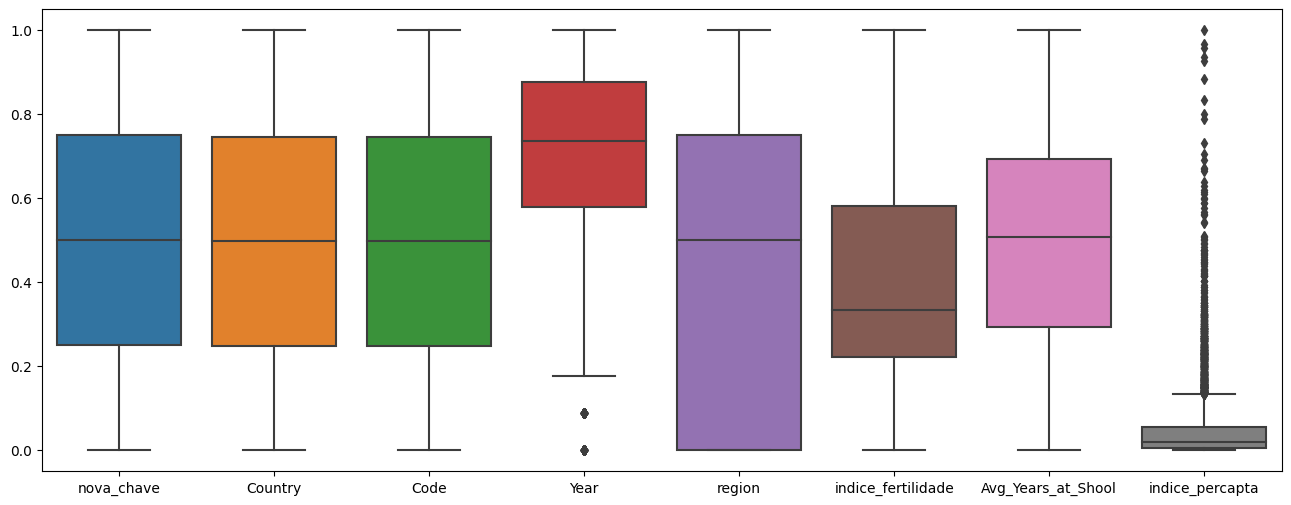

In [164]:
#plot para verificar em gráfico
#plt.figure(figsize=(16,6))
#ax = sns.boxplot(data = dataset_norm)

In [167]:
# Discretização dos dados
#datasetfinal3.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nova_chave,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,indice_percapta
0,0.0,0.0,0.0,1960.0,2.0,7.282,0.22,59.773234
1,1.0,0.0,0.0,1965.0,2.0,7.305,0.29,101.108325
2,2.0,0.0,0.0,1970.0,2.0,7.400,0.35,156.518771
3,3.0,0.0,0.0,1975.0,2.0,7.542,0.62,186.510838
4,4.0,0.0,0.0,1980.0,2.0,7.588,0.78,272.655510
